<h1 style="text-align:center">MPG Data Analysis</h1>
<h3>Author: Alan Cafruni Gularte</h3>

<h3>Loading some libraries that we need to use</h3>

In [5]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

import plotly.offline as py
import plotly.graph_objs as go

from scipy import stats
from scipy.stats.stats import pearsonr
import seaborn as sns


py.init_notebook_mode(connected=True)

%matplotlib inline

<h2 style="text-align:center">Reading the data</h2>

<h3>Let's import the MPG data into a dataframe</h3>

In [6]:
dataframe = pd.read_csv('MPG_data_original.csv', delimiter=',')

In [7]:
dataframe.shape

(398, 9)

The dataframe contains 398 rows and 9 columns.

<h3>Taking a look on its structure and some of its data</h3>

In [8]:
dataframe.head()

,MPG,Cylinders,Displacement,Horsepower,Weight,Accelration,Model year,Origin,Car Name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


All the features seems to be numerical, expect "Car Name" that contain text.

Let's rename 'Model year' and 'Car Name' to a better format:

In [9]:
dataframe = dataframe.rename(columns={'Model year': 'Model_Year', 'Car Name': 'Car_Name'})

We can realize that column 'Car_Name' contains the brand name of the car (first word) and its model name (the rest of the string). It could be interisting to create another column to have only the brand car names for specific analysis.

In [10]:
dataframe['Brand_Name'] = dataframe['Car_Name'].str.split().str.get(0)

In [11]:
print("The unique values of Brand_Name feature are: {}".format(dataframe['Brand_Name'].unique()))

The unique values of Brand_Name feature are: ['chevrolet' 'buick' 'plymouth' 'amc' 'ford' 'pontiac' 'dodge' 'toyota'
 'datsun' 'volkswagen' 'peugeot' 'audi' 'saab' 'bmw' 'chevy' 'hi'
 'mercury' 'opel' 'fiat' 'oldsmobile' 'chrysler' 'mazda' 'volvo' 'renault'
 'toyouta' 'maxda' 'honda' 'subaru' 'chevroelt' 'capri' 'vw'
 'mercedes-benz' 'cadillac' 'mercedes' 'vokswagen' 'triumph' 'nissan']


Analyzing the unique values of 'Brand_Name' feature, we can see that there are wrong names (ie. toyouta). We need to fix them.

In [12]:
dataframe['Brand_Name'] = dataframe['Brand_Name'].replace('toyouta','toyota')
dataframe['Brand_Name'] = dataframe['Brand_Name'].replace('chevroelt','chevrolet')
dataframe['Brand_Name'] = dataframe['Brand_Name'].replace('mercedes','mercedes-benz')
dataframe['Brand_Name'] = dataframe['Brand_Name'].replace(['vokswagen','volkswagen','vw'],'VW')
dataframe['Brand_Name'] = dataframe['Brand_Name'].replace('hi','hundai')

<h2 style="text-align:center">Exploratory Analysis</h2>

In [13]:
dataframe.describe()

,MPG,Cylinders,Displacement,Weight,Accelration,Model_Year,Origin
count,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000
mean,23.514573,5.454774,193.425879,2970.424623,15.568090,76.010050,1.572864
std,7.815984,1.701004,104.269838,846.841774,2.757689,3.697627,0.802055
min,9.000000,3.000000,68.000000,1613.000000,8.000000,70.000000,1.000000
25%,17.500000,4.000000,104.250000,2223.750000,13.825000,73.000000,1.000000
50%,23.000000,4.000000,148.500000,2803.500000,15.500000,76.000000,1.000000
75%,29.000000,8.000000,262.000000,3608.000000,17.175000,79.000000,2.000000
max,46.600000,8.000000,455.000000,5140.000000,24.800000,82.000000,3.000000


Realize that Horsepower column is not availabe in the basic description of the dataframe using the describe function.

In [14]:
dataframe.dtypes

MPG             float64
Cylinders         int64
Displacement    float64
Horsepower       object
Weight            int64
Accelration     float64
Model_Year        int64
Origin            int64
Car_Name         object
Brand_Name       object
dtype: object

Checking for data type of the columns, we can see that Horsepower is an object, instead of numerical. Maybe there is a wrong value in this column, so let's check out it.

<h3>Checking for unique values of Horsepower feature</h3>

In [15]:
print("The unique values of Horsepower feature are: {}".format(np.unique(dataframe.Horsepower)))

The unique values of Horsepower feature are: ['100' '102' '103' '105' '107' '108' '110' '112' '113' '115' '116' '120'
 '122' '125' '129' '130' '132' '133' '135' '137' '138' '139' '140' '142'
 '145' '148' '149' '150' '152' '153' '155' '158' '160' '165' '167' '170'
 '175' '180' '190' '193' '198' '200' '208' '210' '215' '220' '225' '230'
 '46' '48' '49' '52' '53' '54' '58' '60' '61' '62' '63' '64' '65' '66'
 '67' '68' '69' '70' '71' '72' '74' '75' '76' '77' '78' '79' '80' '81'
 '82' '83' '84' '85' '86' '87' '88' '89' '90' '91' '92' '93' '94' '95'
 '96' '97' '98' '?']


Here we can see that this feature has "?" value. Let's remove the rows that contain it.

In [16]:
dataframe = dataframe.drop(dataframe[dataframe.Horsepower == '?'].index)

<h3>Checking data type of Horsepower column after removing invalid values</h3>

In [17]:
dataframe.dtypes

MPG             float64
Cylinders         int64
Displacement    float64
Horsepower       object
Weight            int64
Accelration     float64
Model_Year        int64
Origin            int64
Car_Name         object
Brand_Name       object
dtype: object

Horsepower is still as object type. Probably its values are as string, because of some of them was "?". In this case, let's convert all of its values as integer, that is the expected type.

<h3>Converting Horsepower values to integer</h3>

In [18]:
dataframe.Horsepower = dataframe.Horsepower.astype(int)

<h3>Checking again the data type of Horsepower after converting its values to integer</h3>

In [19]:
dataframe.dtypes

MPG             float64
Cylinders         int64
Displacement    float64
Horsepower        int32
Weight            int64
Accelration     float64
Model_Year        int64
Origin            int64
Car_Name         object
Brand_Name       object
dtype: object

All right! Now we have all the features with the correct type.

<h3>Checking for missing values</h3>

In [20]:
dataframe.isnull().any()

MPG             False
Cylinders       False
Displacement    False
Horsepower      False
Weight          False
Accelration     False
Model_Year      False
Origin          False
Car_Name        False
Brand_Name      False
dtype: bool

There is no missing value on this dataframe.

<h3>Saving the cleaned dataframe</h3>

In [21]:
dataframe.to_csv('MPG_data_cleaned.csv', index=False)

<h3>Now let's know a little about out dataframe and some of its features</h3>

In [22]:
dataframe.describe()

,MPG,Cylinders,Displacement,Horsepower,Weight,Accelration,Model_Year,Origin
count,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000
mean,23.445918,5.471939,194.411990,104.469388,2977.584184,15.541327,75.979592,1.576531
std,7.805007,1.705783,104.644004,38.491160,849.402560,2.758864,3.683737,0.805518
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000,1.000000
25%,17.000000,4.000000,105.000000,75.000000,2225.250000,13.775000,73.000000,1.000000
50%,22.750000,4.000000,151.000000,93.500000,2803.500000,15.500000,76.000000,1.000000
75%,29.000000,8.000000,275.750000,126.000000,3614.750000,17.025000,79.000000,2.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000,3.000000


Text(0, 0.5, 'Frequency')

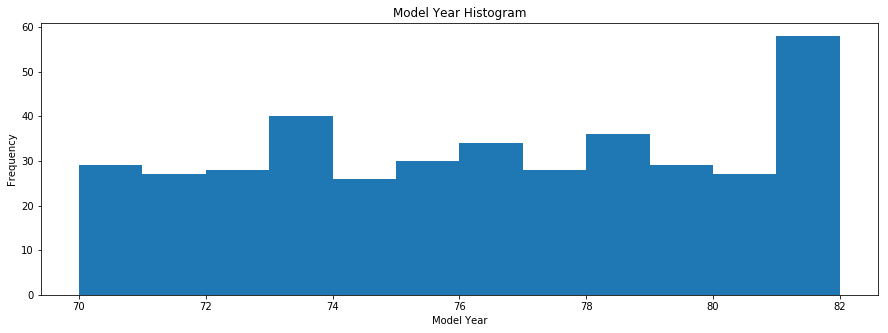

In [23]:
figure(figsize=(15,5))
plt.hist(dataframe['Model_Year'], range=[70, 82], bins=12)
plt.title('Model Year Histogram')
plt.xlabel('Model Year')
plt.ylabel('Frequency')

The cars are from 70 to 82 and the majority are from 70's.

Text(0, 0.5, 'Frequency')

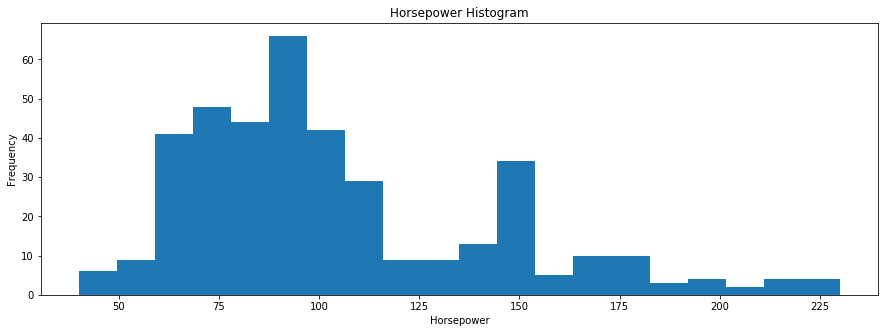

In [24]:
figure(figsize=(15,5))
plt.hist(dataframe['Horsepower'], range=[40, 230], bins=20)
plt.title('Horsepower Histogram')
plt.xlabel('Horsepower')
plt.ylabel('Frequency')

Text(0, 0.5, 'Frequency')

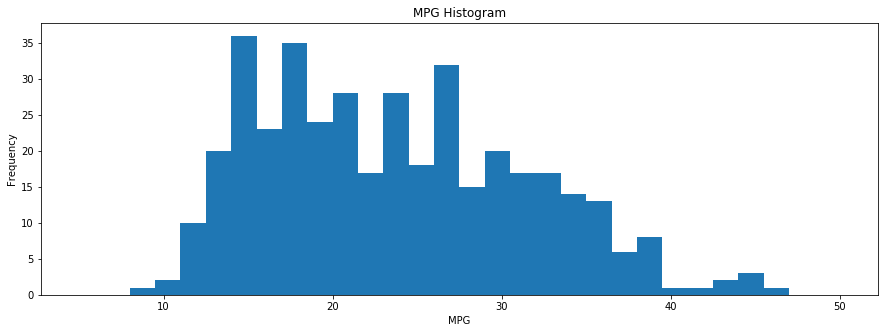

In [25]:
figure(figsize=(15,5))
plt.hist(dataframe['MPG'], range=[5, 50], bins=30)
plt.title('MPG Histogram')
plt.xlabel('MPG')
plt.ylabel('Frequency')

Text(0, 0.5, 'Frequency')

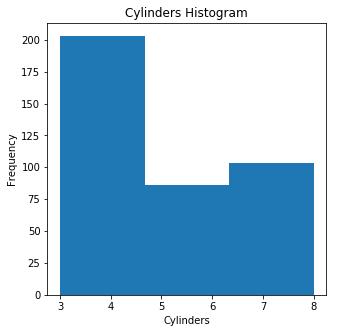

In [26]:
figure(figsize=(5,5))
plt.hist(dataframe['Cylinders'], range=[3, 8], bins=3)
plt.title('Cylinders Histogram')
plt.xlabel('Cylinders')
plt.ylabel('Frequency')

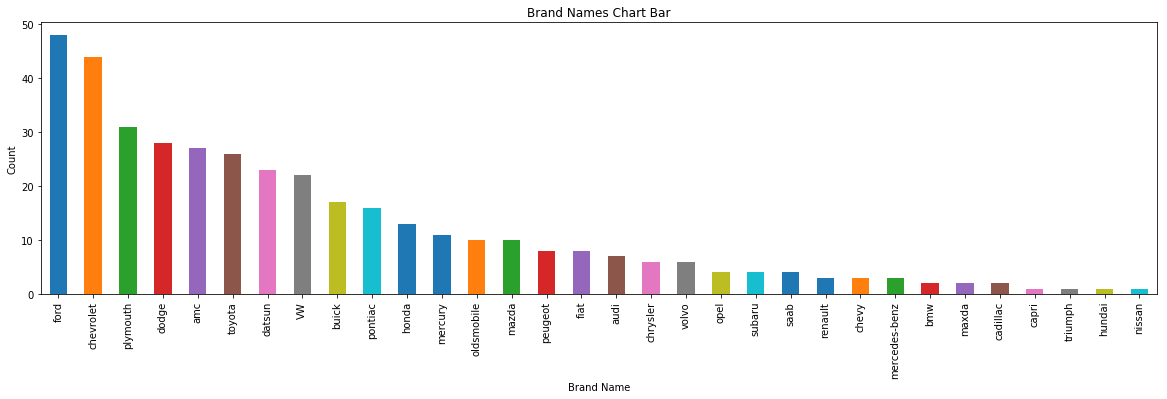

In [27]:
figure(figsize=(20,5))
plt.title('Brand Names Chart Bar')
plt.xlabel('Brand Name')
plt.ylabel('Count')
dataframe['Brand_Name'].value_counts().plot('bar')

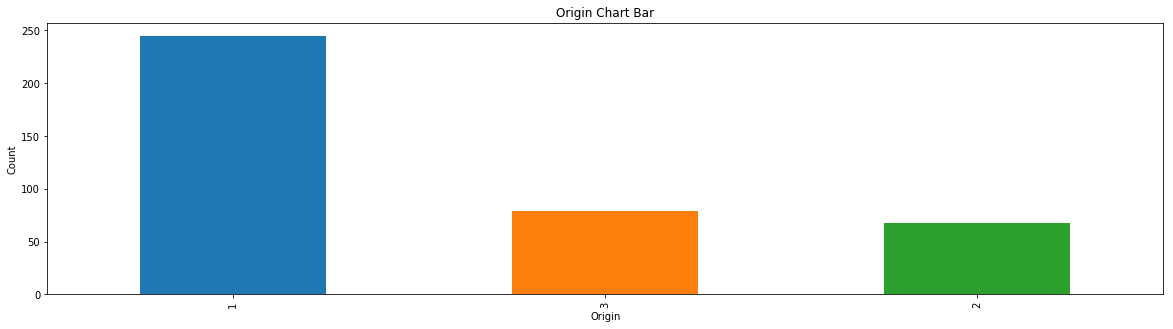

In [28]:
figure(figsize=(20,5))
plt.title('Origin Chart Bar')
plt.xlabel('Origin')
plt.ylabel('Count')
dataframe['Origin'].value_counts().plot('bar')

Here let's anwser one question: <b>Is there any relationship between MPG and Horsepower</b>?

In [29]:
trace = go.Scatter(x = dataframe['Horsepower'],
                   y = dataframe['MPG'],
                   mode = 'markers')
data = [trace]
py.iplot(data)

Just checking this graph, we can have an initial idea that the powerful the car is, more fuel it consumes.

In [30]:
correlation = pearsonr(dataframe['MPG'], dataframe['Horsepower'])
correlation

(-0.7784267838977759, 7.031989029404564e-81)

The correlation between 'MPG' and 'Horsepower' is 0.77 and we can consider that there is a strong correlation between these two features.

And another question: <b>Is there any relationship between MPG and Model Year?</b>

In [31]:
trace = go.Scatter(x = dataframe['Model_Year'],
                   y = dataframe['MPG'],
                   mode = 'markers')
data = [trace]
py.iplot(data)

In [32]:
correlation = pearsonr(dataframe['MPG'], dataframe['Model_Year'])
correlation

(0.5805409660907854, 1.0757935564158563e-36)

Here we can see that correlation is 0.58 where we can consider a moderate cars performance improvement over the years.

<h4>How about the 'Weight' and 'MPG'?</h4>

In [33]:
trace = go.Scatter(x = dataframe['Weight'],
                   y = dataframe['MPG'],
                   mode = 'markers')
data = [trace]
py.iplot(data)

In [34]:
correlation = pearsonr(dataframe['MPG'], dataframe['Weight'])
correlation

(-0.8322442148315754, 6.015296051435466e-102)

Very interisting! The correlation here is -0.83. The bigger is the car, more fuel it consumes, especially the ones with more than 4000 of weight.

<h4>Now let's take a look on MPG distribution per Brand Name</h4>

In [35]:
var = 'Brand_Name'
data_plt = pd.concat([dataframe['MPG'], dataframe[var]], axis=1)

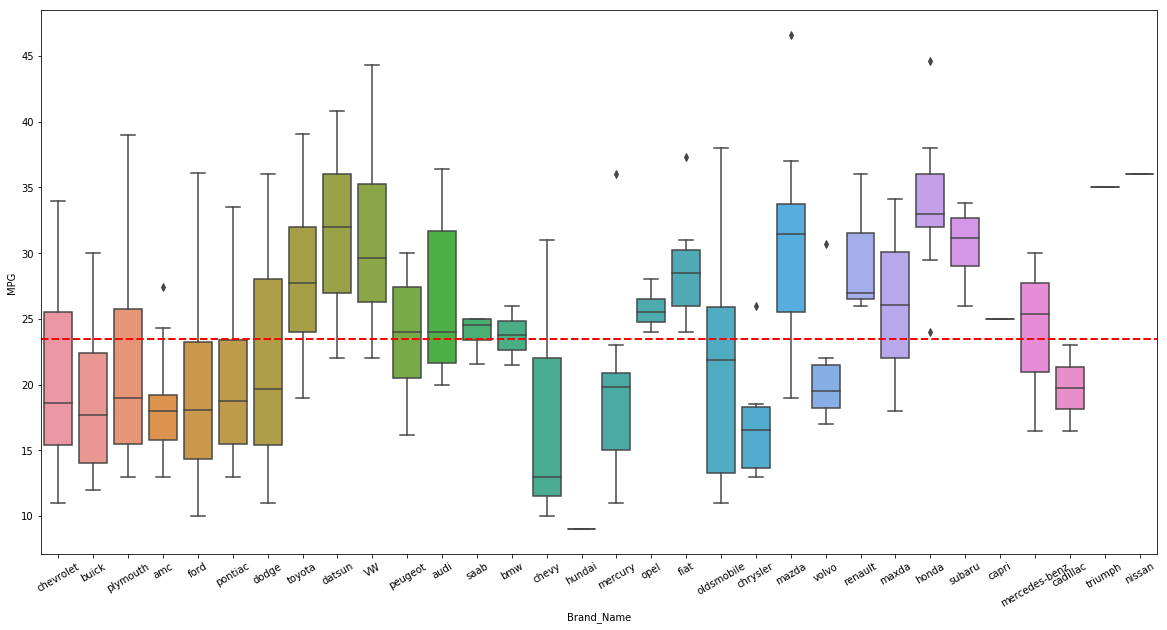

In [36]:
f, ax = plt.subplots(figsize=(20,10))
fig = sns.boxplot(x=var, y="MPG", data=data_plt)
fig.set_xticklabels(ax.get_xticklabels(),rotation=30)
plt.axhline(dataframe.MPG.mean(),color='r',linestyle='dashed',linewidth=2)

The MPG average is 25, indicated by the red line in the above graph. All the boxplots with their median above this average we can consider brands with good performance. The best examples are Honda and Subaro, where their maximum and minimum values are very close to their median. In another hand, Chevy is the brand with the worst performance, followed by Chrysler, Volvo and Cadillac.